In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

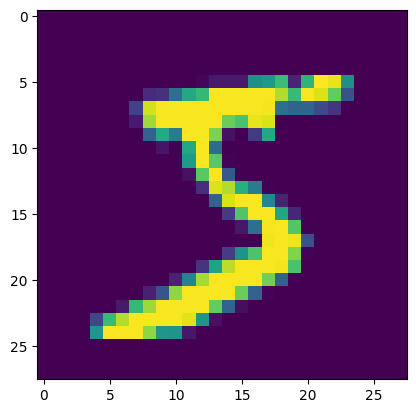

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, 10)

In [16]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

In [21]:
scaled_image=  x_train[0]

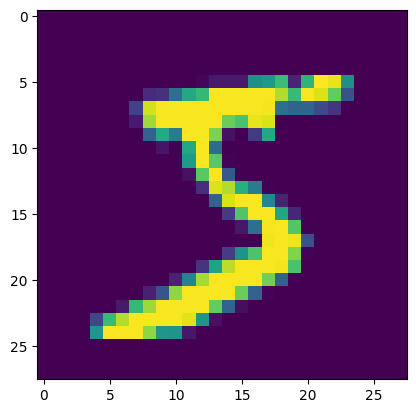

In [22]:
plt.imshow(scaled_image)

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1) #batch size, width, height, color_channels

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer softmax -> multiclass problem
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# input_shape -> what an image is going to look like
# Dense() where 10 neurons, if binary classification problem then 1 neuron output with sigmoid


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=1)

In [30]:
model.fit(x_train, y_cat_train, epochs=10, validation_data = (x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1391 - accuracy: 0.9588 - val_loss: 0.0574 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0421 - val_accuracy: 0.9858


In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139088,0.958817,0.057393,0.9811
1,0.048479,0.984900,0.041986,0.9861
2,0.031609,0.989967,0.042084,0.9858


<Axes: >

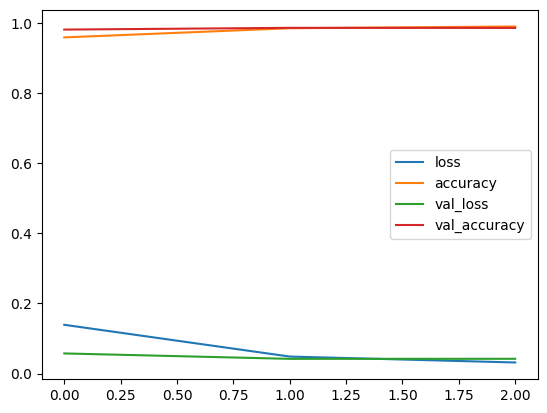

In [33]:
metrics.plot()

<Axes: >

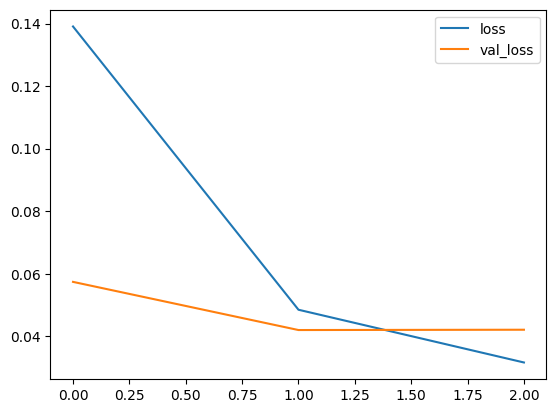

In [34]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

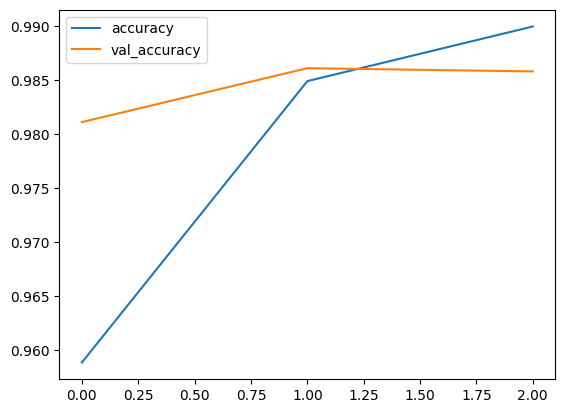

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test, y_test, verbose=0)

ValueError: in user code:

    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\dev\AI-playground\venv\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test, predictions)

array([[ 975,    1,    2,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1130,    1,    1,    0,    0,    2,    0,    1,    0],
       [   2,    0, 1023,    2,    0,    0,    0,    5,    0,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    1,    2,    0,  973,    0,    2,    0,    0,    4],
       [   1,    0,    0,    9,    0,  881,    1,    0,    0,    0],
       [   5,    2,    1,    1,    4,    3,  942,    0,    0,    0],
       [   1,    2,    8,    1,    0,    0,    0, 1014,    1,    1],
       [   5,    0,   10,    9,    0,    2,    2,    3,  941,    2],
       [   4,    1,    0,   13,    6,    7,    0,    6,    0,  972]],
      dtype=int64)

In [50]:
import seaborn as sns

<Axes: >

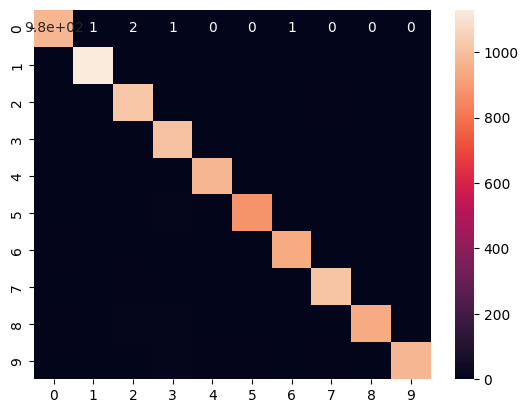

In [53]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [54]:
my_numer = x_test[0]

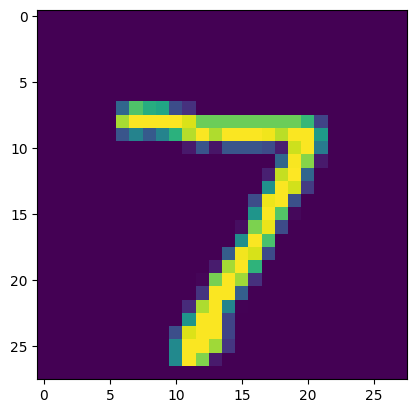

In [55]:
plt.imshow(my_numer.reshape(28,28))

In [57]:
np.argmax(model.predict(my_numer.reshape(1, 28, 28, 1)), axis=-1)

1/1 [==============================] - 0s 46ms/step


array([7], dtype=int64)